c:\Users\ismai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


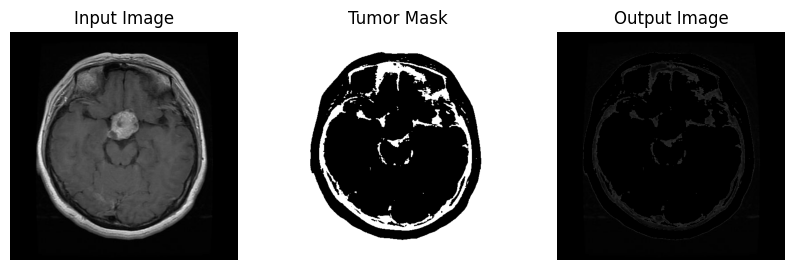

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load input image dataset
input_image = io.imread("brain_tumor_dataset.jpg")

# Convert the image into a 2D array of pixels
image_2d = input_image.reshape(-1, 3)

# Apply K-Means clustering to the 2D array
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
labels = kmeans.labels_

# Reshape the labels to match the shape of the original image
labels_reshaped = labels.reshape(input_image.shape[0], input_image.shape[1])

# Create a mask for the tumor region
tumor_mask = np.zeros_like(labels_reshaped)
tumor_mask[labels_reshaped == 1] = 255

# Apply the mask to the original image
output_image = np.copy(input_image)
output_image[tumor_mask == 0] = 0

# Display the input image, mask, and output image using matplotlib
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(input_image)
plt.title("Input Image")
plt.axis('off')
plt.subplot(132)
plt.imshow(tumor_mask, cmap='gray')
plt.title("Tumor Mask")
plt.axis('off')
plt.subplot(133)
plt.imshow(output_image)
plt.title("Output Image")
plt.axis('off')
plt.show()

c:\Users\ismai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: list index out of range

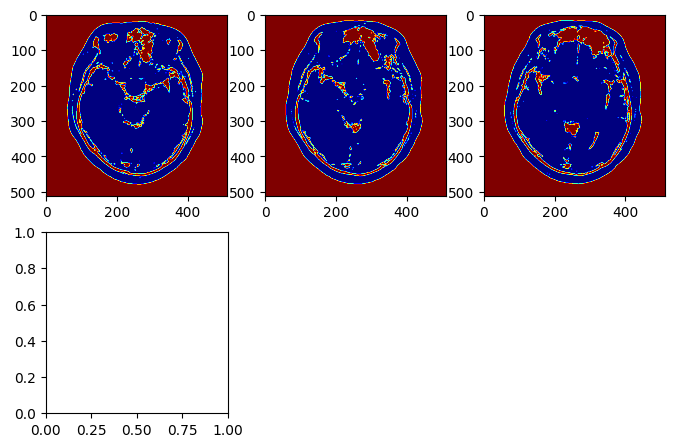

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# load dataset containing brain tumor images
path = 'Image'
files = os.listdir(path)
images = []
for file in files:
    if file.endswith('.jpg'):
        image = io.imread(os.path.join(path, file))
        images.append(image)

# create 2D array of pixel values for each image
pixels = []
for image in images:
    pixel = np.reshape(image, (-1, 3))
    pixels.append(pixel)

# segment tumor using k-means clustering
n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(np.concatenate(pixels))
labels = kmeans.predict(np.concatenate(pixels))

# create segmented images
segmented_images = []
for i, image in enumerate(images):
    segmented_image = np.reshape(labels[i*image.shape[0]*image.shape[1]:(i+1)*image.shape[0]*image.shape[1]], (image.shape[0], image.shape[1]))
    segmented_images.append(segmented_image)

# plot segmented images
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(segmented_images[i-1], cmap='jet')
plt.show()